# Sentiment Analysis on Tweets

## Project Overview
This notebook aims to perform sentiment analysis on a dataset of tweets using machine learning techniques. The project involves loading and preprocessing the data, applying text vectorization, and training classifiers to predict sentiment labels. The key steps include data loading, preprocessing, stemming, vectorization, model training, evaluation, and saving the trained models and vectorizer.

## Key Techniques and Tools
- **Data Loading and Preprocessing:** Loading the dataset, renaming columns, handling missing values, and balancing labels.
- **Text Preprocessing:** Stemming and removing stop words using NLTK.
- **Text Vectorization:** Using TF-IDF vectorizer to transform text data into numerical features.
- **Model Training and Evaluation:** Training Logistic Regression and Linear SVC classifiers, evaluating their performance using accuracy, confusion matrix, and classification report.
- **Model Saving:** Saving the trained models and vectorizer using joblib for future use.

## Code Overview
- **Libraries:** Importing necessary libraries for data manipulation, visualization, text processing, machine learning, and model saving.
- **Functions:**
  - `load_data()`: Loads and displays initial information about the dataset.
  - `preprocess()`: Preprocesses the dataset, including renaming columns, handling null values, and balancing labels.
  - `stemming()`: Stems text data and removes stop words.
  - `fit_predict()`: Trains the model, predicts on test data, evaluates performance, and plots confusion matrix.
- **Main Execution:**
  - Loading and preprocessing the dataset.
  - Stemming text data.
  - Splitting data into training and testing sets.
  - Vectorizing text data.
  - Training and evaluating classifiers.
  - Saving trained models and vectorizer.

In [1]:
# import kaggle module
%pip install kaggle

     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     -------------- ----------------------- 30.7/82.7 kB 640.0 kB/s eta 0:00:01
     -------------------------------------  81.9/82.7 kB 762.6 kB/s eta 0:00:01
     -------------------------------------- 82.7/82.7 kB 658.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105802 sha256=71b545e1074920d23e7b558d81017340651eb7a19a4dff9c98cd3c95e89501a2
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\ff\55\fb\b27a466be754d2a06ffe0e37b248d844f090a63b51becea85d
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

The syntax of the command is incorrect.
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '~/.kaggle/kaggle.json': No such file or directory


In [6]:
# Download the dataset from Kaggle and save it directly into the PrepareModel folder
!kaggle datasets download -d kazanova/sentiment140 -p PrepareModel
# Unzip the file in the PrepareModel folder
!unzip PrepareModel/sentiment140.zip -d PrepareModel
# Remove the zip file after unzipping
!rm PrepareModel/sentiment140.zip

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 88% 71.0M/80.9M [00:00<00:00, 149MB/s]
100% 80.9M/80.9M [00:00<00:00, 129MB/s]
Archive:  PrepareModel/sentiment140.zip
  inflating: PrepareModel/training.1600000.processed.noemoticon.csv


In [1]:
# Load dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import os

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

# Load data

In [4]:
df = pd.read_csv('PrepareModel/training.1600000.processed.noemoticon.csv', encoding = 'ISO-8859-1', header = None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
# Show shape of the dataset
df.shape

(1600000, 6)

In [6]:
# Show some information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [7]:
# Show columns of the dataset to know it and know its datatypes
df.columns

Index([0, 1, 2, 3, 4, 5], dtype='int64')

# Preprocessing data

In [8]:
# Take copy from original dataset to make preprocessing steps on
df_processed = deepcopy(df)

In [9]:
# Change columns names
df_processed = df_processed.rename(columns={0: 'target', 1: 'ids',2:'date',3:'flag',4:'user',5:'text'})
df_processed.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [10]:
# Check about null values to check if we will handle missing values if exist
df_processed.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

## Handle invalid data

In [11]:
# Get the most relevant columns to classify based on that is text and also the output labels
df_processed = df_processed[['target', 'text']]
df_processed.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


target
0    800000
4    800000
Name: count, dtype: int64


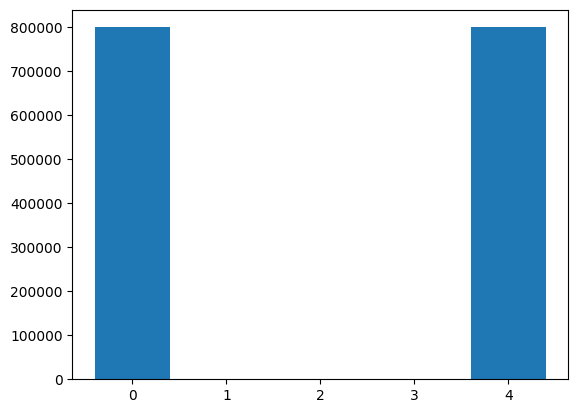

In [12]:
# Check about degree of balancing for the labels counts
counts = df_processed['target'].value_counts()
print(counts)
plt.bar(counts.index, counts)
plt.show()

In [13]:
# Replace 4's in the text column into 1's to make the values (0 -> negative, 1 -> positive)
df_processed['target'] = df_processed['target'].apply(lambda x: 1 if x == 4 else 0)
df_processed.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


target
0    800000
1    800000
Name: count, dtype: int64


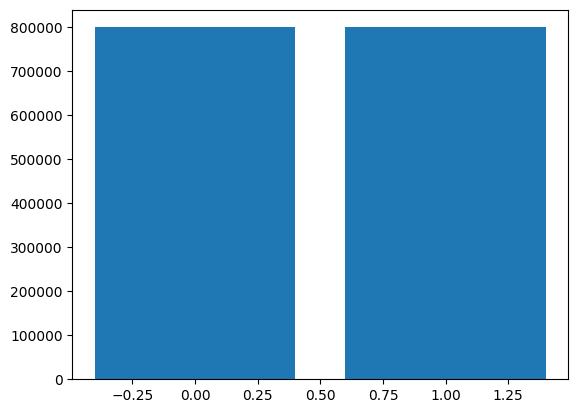

In [14]:
# Check the change of replacing the 4's values
counts = df_processed['target'].value_counts()
print(counts)
plt.bar(counts.index, counts)
plt.show()

## Stemming text
**stemming process**: text preprocessing technique used in natural language processing (NLP) to reduce words to their root or base form. The main goal of stemming is to group together different forms of a word so they can be analyzed as a single item.

In [15]:
# Create function to take the content and stemmer and stem it
def stemming(content, stemmer):
    # Remove non-alphabetical characters
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    
    # Convert sentences into lowercase sentences and split each into words
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    
    # Prepare stop words
    stop_words = set(stopwords.words('english'))
    
    # Stem words and remove stop words
    stemmed_content = [stemmer.stem(word) for word in stemmed_content if word not in stop_words]
    stemmed_content = ' '.join(stemmed_content)
    
    return stemmed_content

In [16]:
# Show first rows of dataset before stemming it
df_processed.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [17]:
# Create stemmer
stemmer = PorterStemmer()

In [18]:
# Apply stemming function to the 'text' column in DataFrame
df_processed['text'] = df_processed['text'].apply(lambda x: stemming(x, stemmer))

In [19]:
# Show first rows of dataset after stemming it
df_processed.head()

,target,text
0,0,switchfoot http twitpic com zl awww bummer sho...
1,0,upset updat facebook text might cri result sch...
2,0,kenichan dive mani time ball manag save rest g...
3,0,whole bodi feel itchi like fire
4,0,nationwideclass behav mad see


## Split data into input and label data

In [20]:
X = df_processed['text']
Y = df_processed['target']
print(f'X shape {X.shape}')
print(f'Y shape {Y.shape}')

X shape (1600000,)
Y shape (1600000,)


In [21]:
# Split data into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.9, stratify = Y, random_state = 42)
print(f'x train shape {x_train.shape}, x test shape {x_test.shape}')
print(f'y train shape {y_train.shape}, y test shape {y_test.shape}')

x train shape (1440000,), x test shape (160000,)
y train shape (1440000,), y test shape (160000,)


In [22]:
# Show train data before vectorization
x_train.head()

1214440    brandempir time cud meet b ur welcom come c la...
717515     start feel wors cannot wait doctor appt ugh co...
921469                                 happi mother day mama
555412     appl new iphon g arriv th june peopl pre order...
676310               bed cpr class morn work right til close
Name: text, dtype: object

## Vectorize content into numerical values using TfidfVectorizer¶
**TfidfVectorizer** is a class provided by the scikit-learn library in Python, used for text feature extraction and transformation. It converts a collection of raw text documents into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features. This is a common step in text processing for machine learning and natural language processing tasks.

In [23]:
# Create vectorizer 
vectorizer = TfidfVectorizer()

# Vectorize text column
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [24]:
# Show train data before vectorization
print(x_train_vec)

  (0, 157521)	0.14227434800630656
  (0, 441184)	0.24263048344716764
  (0, 142949)	0.22570871714493082
  (0, 149758)	0.29629666587211306
  (0, 246053)	0.1841395263579865
  (0, 85020)	0.18141083315188428
  (0, 473364)	0.2434991861711954
  (0, 460396)	0.2250871645655948
  (0, 279755)	0.2357402163366208
  (0, 92944)	0.3702355372648611
  (0, 441356)	0.32344030168791965
  (0, 54260)	0.5550833693426649
  (1, 73752)	0.3341363534174527
  (1, 460961)	0.25353104652147784
  (1, 88549)	0.2447376850475357
  (1, 456736)	0.2806461079892577
  (1, 23296)	0.42288191979575007
  (1, 113661)	0.3487681199238674
  (1, 469841)	0.22689432021664452
  (1, 65090)	0.3396794077574405
  (1, 481276)	0.3397537870041942
  (1, 140489)	0.20628216886093162
  (1, 412272)	0.24515242650770971
  (2, 269735)	0.6596133930553354
  (2, 101221)	0.3062176591252955
  :	:
  (1439996, 261253)	0.5119819961983575
  (1439997, 453237)	0.6748188344431275
  (1439997, 451644)	0.48799783682644043
  (1439997, 166903)	0.47405509828309517
  (1439

# Modeling

In [25]:
# Function to perform the model functionalities
def fit_predict(classifier, x_train, y_train, x_test, y_test):
    
    # Make model fit data
    classifier.fit(x_train, y_train)
    
    # Get Score on train and test data
    train_score = classifier.score(x_train, y_train)
    test_score = classifier.score(x_test, y_test)
    print(f'train score is {train_score}, test score is {test_score}')
    
    # Make model predict on test data
    test_prediction = classifier.predict(x_test)
    # Get accuracy, confusion matrix and classification report
    accuracy = accuracy_score(y_test, test_prediction) 
    cf_matrix = confusion_matrix(y_test, test_prediction)
    cl_report = classification_report(y_test, test_prediction)
    
    # Plot confusion matrix
    plt.figure(figsize=(7,7))
    sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Show accuracy and classification report
    print(f'accuracy: {accuracy}\nclassification report:\n{cl_report}', '\n\n')
    
    return classifier

In [26]:
# Put all required models that can fit this problem
models = {
    'LogisticRegression': LogisticRegression(),
    'LinearSVC': LinearSVC()
}

LogisticRegression:



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train score is 0.8086319444444444, test score is 0.77806875


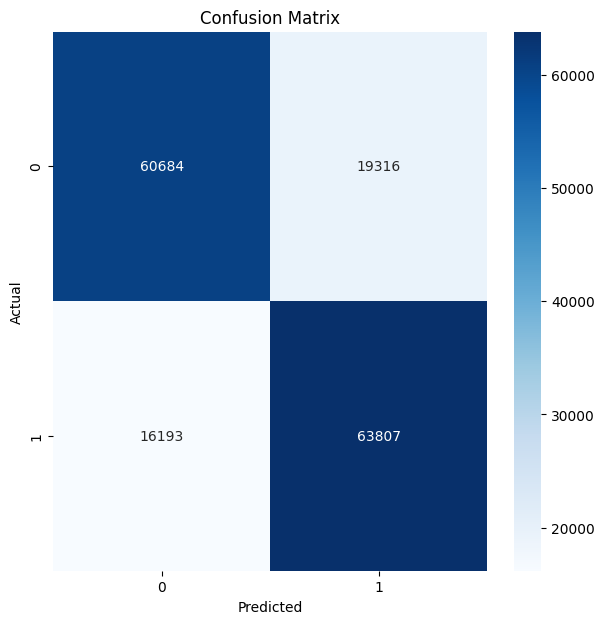

accuracy: 0.77806875
classification report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.77     80000
           1       0.77      0.80      0.78     80000

    accuracy                           0.78    160000
   macro avg       0.78      0.78      0.78    160000
weighted avg       0.78      0.78      0.78    160000
 


LinearSVC:

train score is 0.8605791666666667, test score is 0.7697125


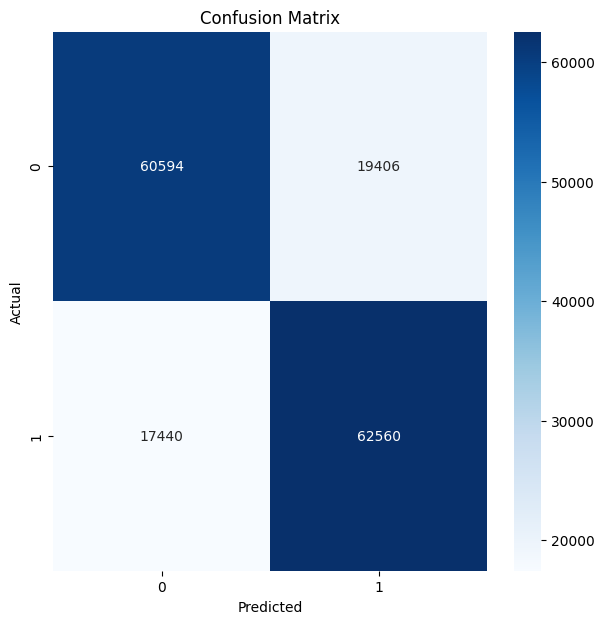

accuracy: 0.7697125
classification report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77     80000
           1       0.76      0.78      0.77     80000

    accuracy                           0.77    160000
   macro avg       0.77      0.77      0.77    160000
weighted avg       0.77      0.77      0.77    160000
 




In [27]:
trained_models = {}
for name, model in models.items():
    print(f'{name}:\n')
    model = fit_predict(model, x_train_vec, y_train, x_test_vec, y_test)
    trained_models[name] = deepcopy(model)

# Save best model¶
Based on the previous results, the LogisticRegression Classifier model is the best one on the test data with accuracy 78%.

In [28]:
# Save model and vectorizer
model_path = 'PrepareModel\logisticregressor.sav'
vectorizer_path = 'PrepareModel\\vectorizer.sav'

# Access logistic regression model
logisticregressor = trained_models['LogisticRegression']

# Save the Logistic Regression model if it does not already exist
if not os.path.exists(model_path):
    joblib.dump(trained_models['LogisticRegression'], model_path)
    print(f"Saved Logistic Regression model to {model_path}")
else:
    print(f"Logistic Regression model already exists at {model_path}")

# Save the vectorizer if it does not already exist
if not os.path.exists(vectorizer_path):
    joblib.dump(vectorizer, vectorizer_path)
    print(f"Saved vectorizer to {vectorizer_path}")
else:
    print(f"Vectorizer already exists at {vectorizer_path}")

['vectorizer.sav']

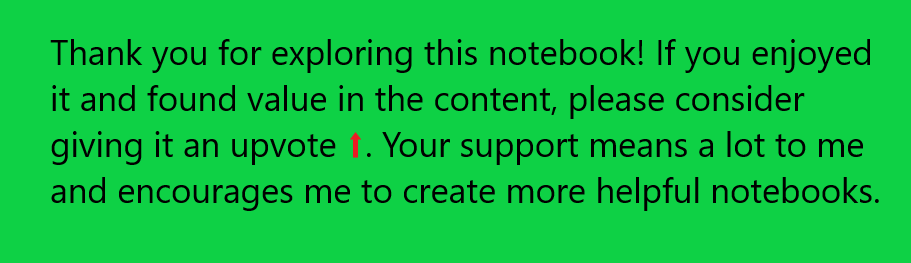